# **Insurance Customer Churn Prediction**

Yohanes Setiawan

Surabaya, Indonesia

yoh.set95@gmail.com

# **Business Understanding**

## Introduction
* Insurance companies around the world operate in a very competitive environment
* With various aspects of data collected from millions of customers, it is painstakingly hard to analyse and understand the reason for a customer’s decision to switch to a different insurance provider
* Knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening

## Problem Statement
Customer churn is a serious problem in companies

## Goal
To prevent customer churn in insurance companies

## Research Questions
* How to predict customer churn in an insurance company?
* What are influenced factors of customer churn in an insurance company?

## Objective Statement
* Creating a machine learning model for customer churn prediction
* Analyzing influenced factors of customer churn in an insurance company

# **Analytical Approach**

* Descriptive analysis
* Graph analysis
* Table analysis
* Sentiment analysis

# **Data Understanding**

## Dataset Description

* The dataset is taken from https://www.kaggle.com/datasets/mukulsingh/insurance-churn-prediction?select=Test.csv (Insurance Churn Prediction)
* Provided are **16 anonymized factors** (feature_0 to feature 15) that influence the churn of customers in the insurance industry

The unzipped folder will have the following files.

Train.csv – 33908 observations.

Test.csv – 11303 observations.

Target Variable: labels


## Load Data

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [ ]:
train_churn = pd.read_csv('/content/drive/MyDrive/IBM ML/Classification/Train.csv')
train_churn.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [ ]:
test_churn = pd.read_csv('/content/drive/MyDrive/IBM ML/Classification/Test.csv')
test_churn.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


## Dataset Information

In [ ]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [ ]:
test_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   11303 non-null  float64
 1   feature_1   11303 non-null  float64
 2   feature_2   11303 non-null  float64
 3   feature_3   11303 non-null  float64
 4   feature_4   11303 non-null  float64
 5   feature_5   11303 non-null  float64
 6   feature_6   11303 non-null  float64
 7   feature_7   11303 non-null  int64  
 8   feature_8   11303 non-null  int64  
 9   feature_9   11303 non-null  int64  
 10  feature_10  11303 non-null  int64  
 11  feature_11  11303 non-null  int64  
 12  feature_12  11303 non-null  int64  
 13  feature_13  11303 non-null  int64  
 14  feature_14  11303 non-null  int64  
 15  feature_15  11303 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 1.4 MB


* There is no missing value in the dataset
* All of columns are numerical values

## Checking Duplicated Data

In [ ]:
train_churn.duplicated().sum()

0

In [ ]:
test_churn.duplicated().sum()

0

There is no duplicated data in the dataset

# **Exploratory Data Analysis (EDA)**

## Descriptive Statistics

In [ ]:
train_churn.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [ ]:
test_churn.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,0.012473,-0.007751,0.000638,0.000159,0.000894,0.013955,0.022493,4.349907,1.157746,1.223215,0.017694,0.556843,0.161904,0.642750,5.530567,2.552774
std,1.000657,0.955969,0.997467,0.992516,0.988834,1.017796,1.437557,3.270622,0.612624,0.744699,0.131844,0.496780,0.368379,0.898957,3.018013,0.994778
min,-2.159994,-1.535528,-1.779108,-0.998595,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.425743,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,-0.182341,-0.306520,0.023260,-0.299633,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000
75%,0.759399,0.015511,0.624050,0.232354,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000
max,5.091402,26.222907,1.825628,12.068100,12.342261,8.297431,119.135982,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000


* All of columns have different range of values
* Therefore, scaling features is needed

## Univariate Distribution of Observations

In [ ]:
train_churn.shape[1]/5

3.4

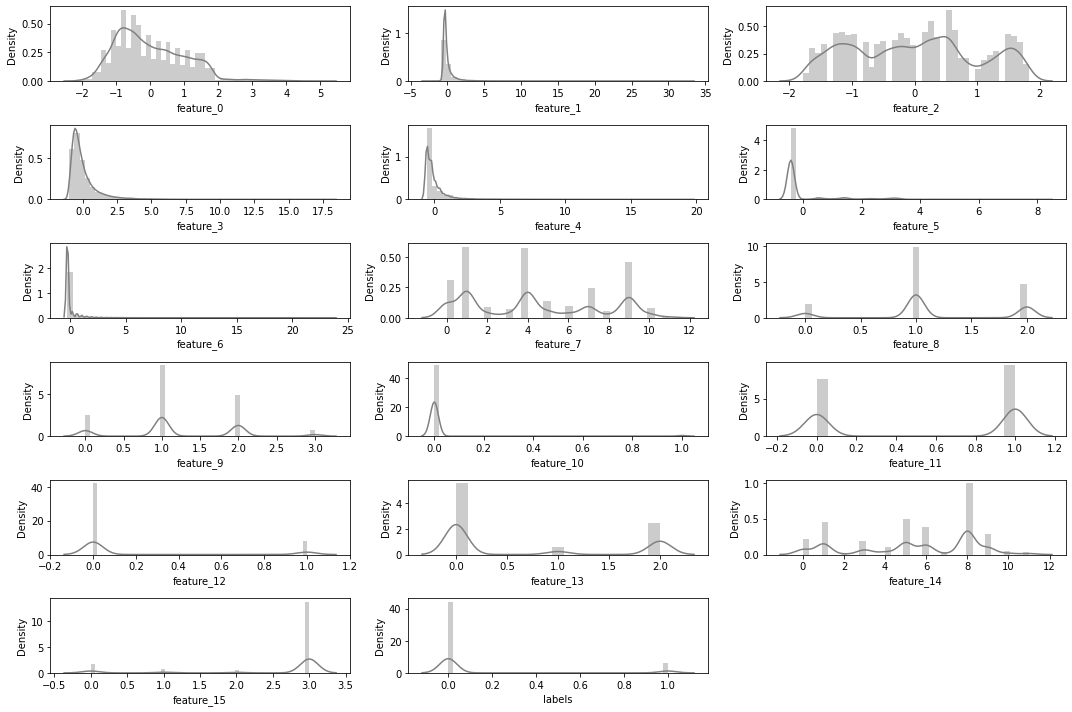

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, train_churn.shape[1]):
    plt.subplot(6, train_churn.shape[1]/5, i+1)
    sns.distplot(train_churn.iloc[:,i], color='gray')
    plt.tight_layout()

* Skewed: `feature_0`,`feature_1`, `feature_3`,`feature_4`,`feature_5`,`feature_6`,`feature_10`,`feature_11`,`feature_13`

## Box Plot

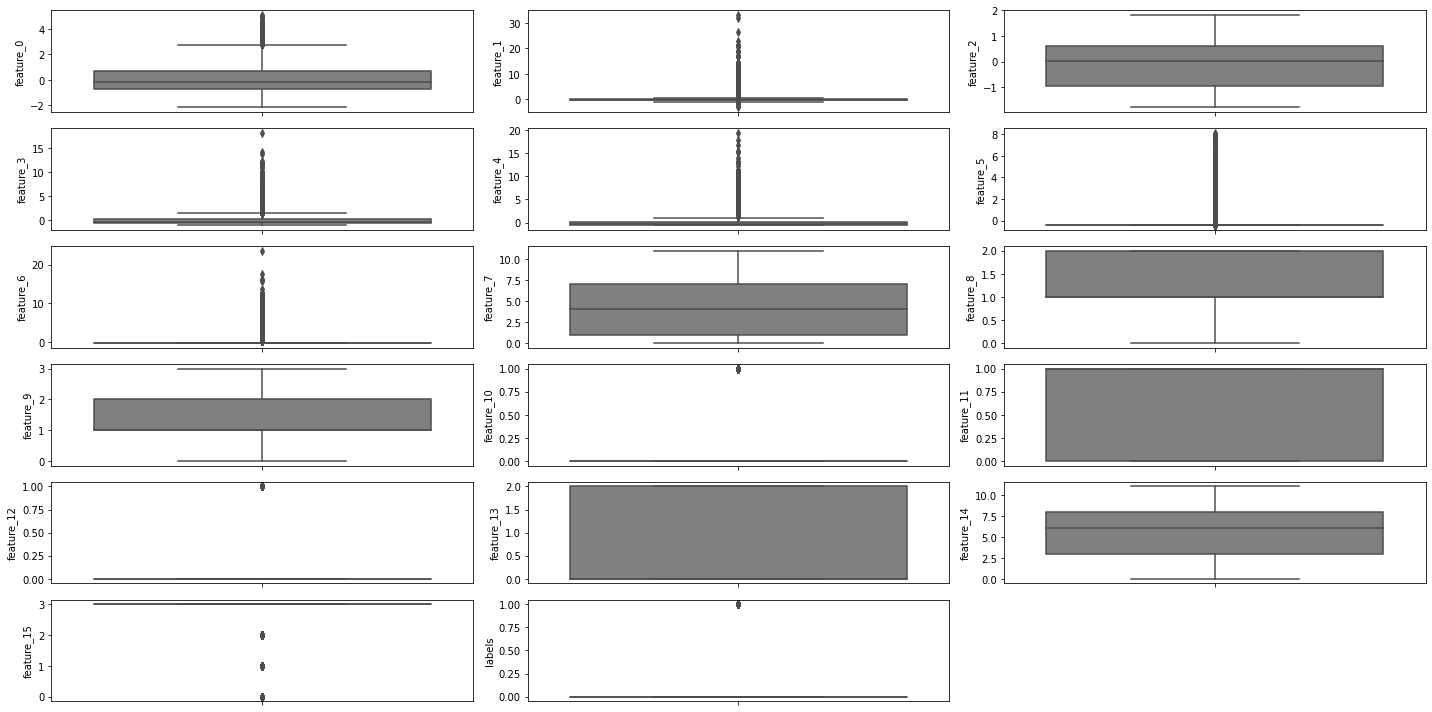

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, train_churn.shape[1]):
    plt.subplot(6, train_churn.shape[1]/5, i+1)
    sns.boxplot(y=train_churn.iloc[:,i], color='gray', orient='v')
    plt.tight_layout()

* Highly influenced by outliers: `feature_0`,`feature_1`,`feature_3`,`feature_4`,`feature_5`,`feature_6`
* Lower influenced by outliers: `feature_10`,`feature_12`,`feature_15`

## Categorical Plot (Integers)

I plot the int64 columns

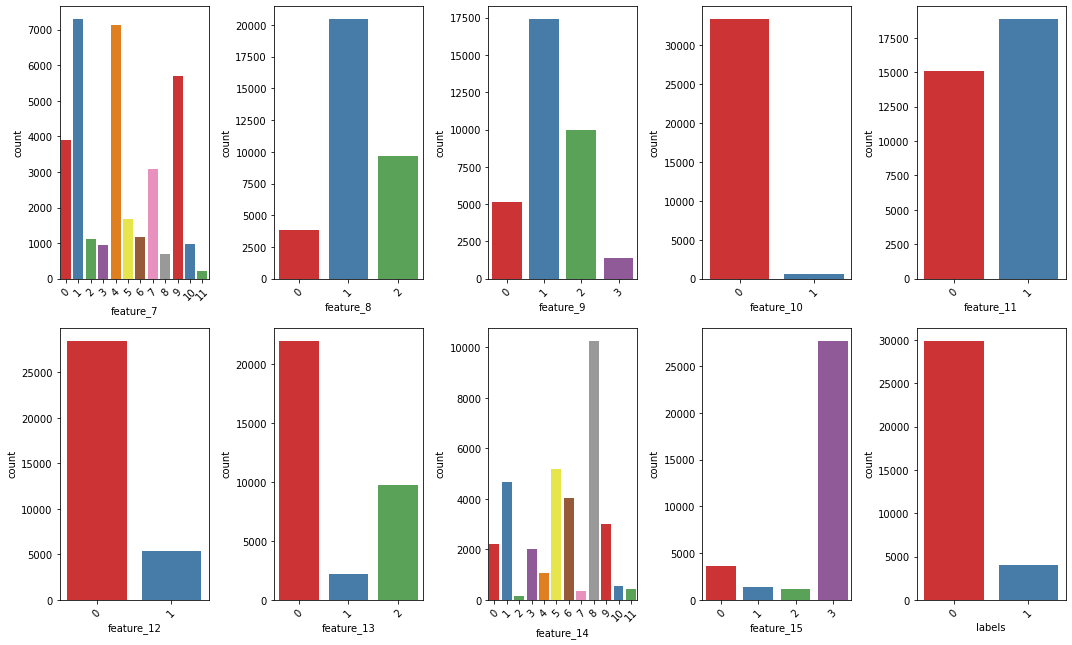

In [ ]:
plt.figure(figsize=(15,13))
for i in range(0, train_churn.select_dtypes(exclude ='float64').shape[1]):
    plt.subplot(3, train_churn.select_dtypes(exclude ='float64').shape[1]/2, i+1) 
    sns.countplot(data=train_churn.select_dtypes(exclude ='float64'), x=list(train_churn.select_dtypes(exclude ='float64').columns)[i], palette='Set1')
    plt.xticks(rotation=45)
    plt.xlabel(list(train_churn.select_dtypes(exclude ='float64').columns)[i])
    plt.tight_layout()

* I have severe imbalanced class in `labels`

## Correlation

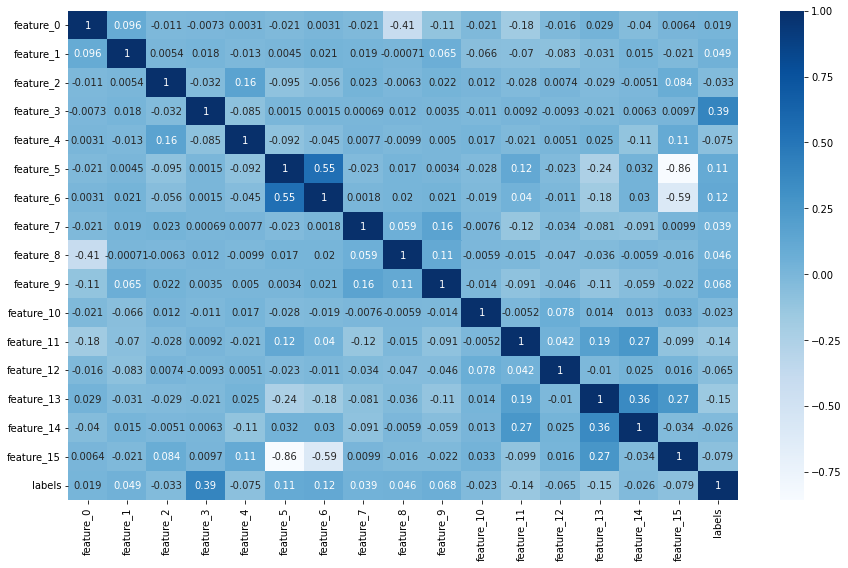

In [ ]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(train_churn.corr(), cmap='Blues', annot = True);

* `feature_5` and `feature_6` are highly positive correlated (+0.55)
* `feature_5` and `feature_15` are highly negative correlated (-0.86)
* `feature_6` and `feature_15` are highly negative correlated (-0.59)

Therefore, `feature_5` and `feature_6` should be removed to prevent multicollinearity

# **Feature Engineering**

## Handling Outlier (Interquartile Range Analysis)

In [ ]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]

In [ ]:
# Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(train_churn)}')
df_train = train_churn.copy()
outliers = ['feature_0','feature_1','feature_3','feature_4','feature_5','feature_6']
for i in outliers:
  df_train = subset_by_iqr(df_train, i) 
print(f'Count of rows after removing outlier: {len(df_train)}')

Count of rows before removing outlier: 33908
Count of rows after removing outlier: 21113


* train_churn -> dataset with outliers
* df_train -> dataset without outliers

## Removing Multicollinear Features

In [ ]:
train_churn = train_churn.drop(['feature_5', 'feature_6'] ,axis=1)
train_churn.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,0,1,1,0,0,0,0,8,3,0


In [ ]:
df_train = df_train.drop(['feature_5', 'feature_6'] ,axis=1)
df_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,4,0,2,0,1,0,0,5,3,0
6,0.288529,-0.322285,-0.817845,-0.645231,-0.569351,9,1,1,0,1,0,0,5,3,0
7,0.006007,-0.332138,-0.817845,-0.322932,-0.569351,9,1,1,0,1,0,0,5,3,0


In [ ]:
test_churn = test_churn.drop(['feature_5', 'feature_6'] ,axis=1)
test_churn.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,8,2,1,0,1,0,2,8,3


In [ ]:
df_train.to_csv('df_train.csv', index=False)
train_churn.to_csv('train_churn.csv', index=False)
test_churn.to_csv('test_churn.csv', index=False)
!cp 'df_train.csv' '/content/drive/MyDrive/IBM ML/Classification'
!cp 'train_churn.csv' '/content/drive/MyDrive/IBM ML/Classification'
!cp 'test_churn.csv' '/content/drive/MyDrive/IBM ML/Classification'
print('Saving data is done!')

Saving data is done!


# **Data Preparation**

## Train Test Split

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/IBM ML/Classification/df_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   21113 non-null  float64
 1   feature_1   21113 non-null  float64
 2   feature_2   21113 non-null  float64
 3   feature_3   21113 non-null  float64
 4   feature_4   21113 non-null  float64
 5   feature_7   21113 non-null  int64  
 6   feature_8   21113 non-null  int64  
 7   feature_9   21113 non-null  int64  
 8   feature_10  21113 non-null  int64  
 9   feature_11  21113 non-null  int64  
 10  feature_12  21113 non-null  int64  
 11  feature_13  21113 non-null  int64  
 12  feature_14  21113 non-null  int64  
 13  feature_15  21113 non-null  int64  
 14  labels      21113 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.4 MB


In [3]:
# Separate features and target variables (df_train)
df_train_feat = df_train.loc[:, df_train.columns != "labels"]
df_train_target = df_train["labels"]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.3, 
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({0: 13942, 1: 837})
Class from testing data df_test Counter({0: 5975, 1: 359})


## Feature Transformation

In [ ]:
X_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
count,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.000000,14779.0
mean,-0.056280,-0.245799,-0.006058,-0.209741,-0.184706,4.280060,1.164625,1.194262,0.021855,0.553759,0.176128,0.775695,5.529129,3.0
std,0.930037,0.271874,1.001941,0.534416,0.433109,3.309924,0.605299,0.742230,0.146216,0.497118,0.380942,0.947585,2.854981,0.0
min,-2.159994,-1.066193,-1.779108,-1.002478,-0.569351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,-0.841558,-0.435924,-0.938003,-0.606400,-0.569351,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.0
50%,-0.182341,-0.339364,0.023260,-0.350114,-0.246560,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.0
75%,0.665225,-0.140660,0.744208,0.061497,0.076230,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.0
max,2.737053,0.675832,1.825628,1.471069,1.044601,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.0


* Skewed: `feature_0`,`feature_1`, `feature_3`,`feature_4`,`feature_10`,`feature_11`,`feature_13`
* Therefore, those features should be transformed with Log Transformation

In [5]:
skewed_negative = ['feature_0','feature_1','feature_3','feature_4']
skewed = ['feature_10','feature_11','feature_13']

### Log Transformation

In [6]:
X_train_log = X_train.copy() 
for i in skewed_negative:
  #print('Minimum of',i,'is',X_train[i].min()) # to be used for testing data
  X_train_log[i] = (X_train_log[i]-X_train_log[i].min()+1).transform(np.log)

for i in skewed:
  logt = np.log(X_train_log[i]+1)
  X_train_log[i] = logt

print("Log Transformation success!")

Log Transformation success!


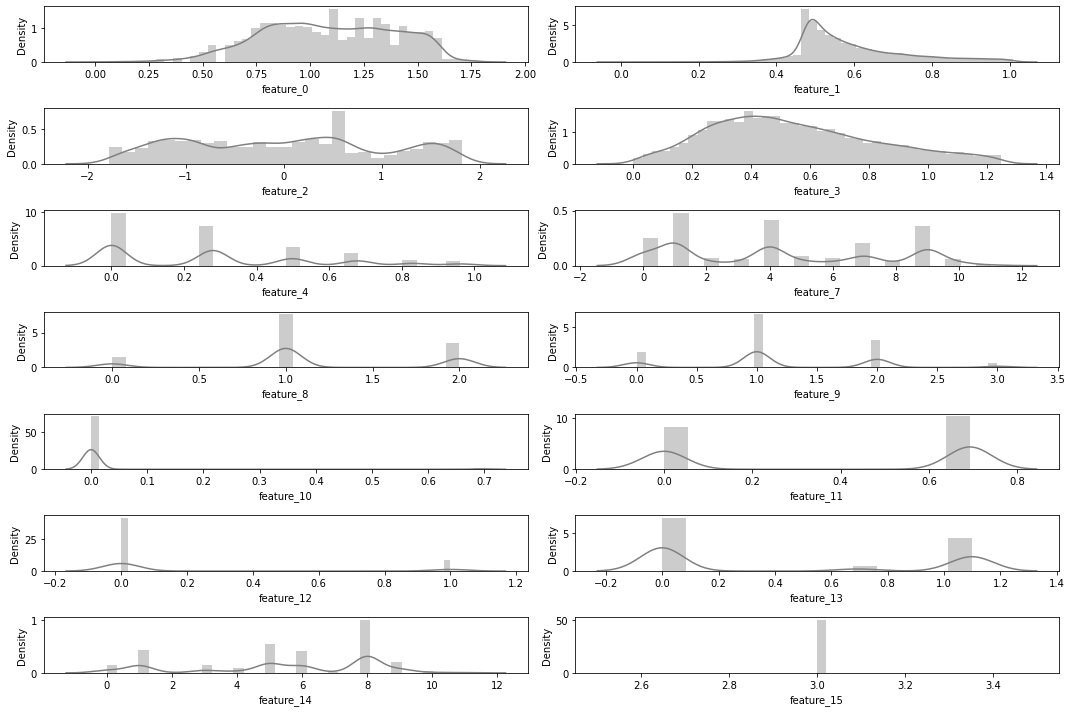

In [11]:
plt.figure(figsize=(15, 10))
for i in range(0, X_train_log.shape[1]):
    plt.subplot(7, X_train_log.shape[1]/6, i+1)
    sns.distplot(X_train_log.iloc[:,i], color='gray')
    plt.tight_layout()

### Box Cox Transformation

In [12]:
from scipy.stats import boxcox
X_train_bc = X_train.copy() 
for i in skewed_negative:
  bc_result = boxcox(X_train_bc[i]-X_train_bc[i].min()+1)
  X_train_bc[i] = bc_result[0]

for i in skewed:
  bc_result = boxcox(X_train_bc[i]+1)
  X_train_bc[i] = bc_result[0]


print("Box Cox Transformation success!")

Box Cox Transformation success!


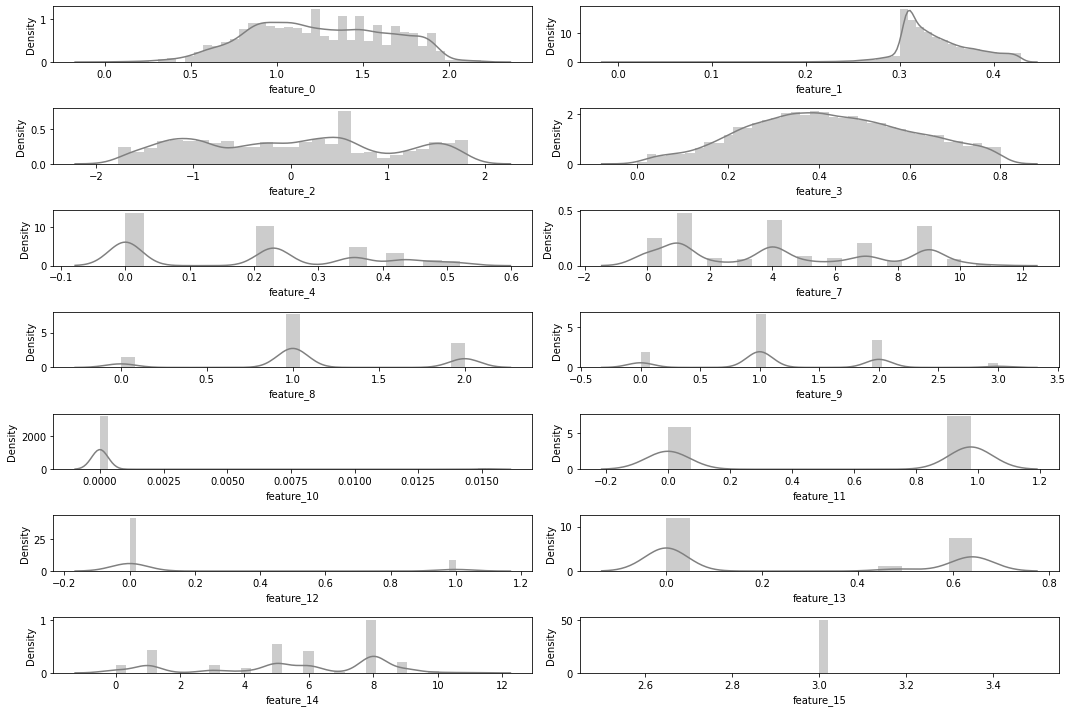

In [13]:
plt.figure(figsize=(15, 10))
for i in range(0, X_train_bc.shape[1]):
    plt.subplot(7, X_train_bc.shape[1]/6, i+1)
    sns.distplot(X_train_bc.iloc[:,i], color='gray')
    plt.tight_layout()

### Chosen Feature Transformation

I choose Log Transformation because the features look more like normal distribution

In [7]:
# Transforming X_test
for i in skewed_negative:
  #print('Minimum of',i,'is',X_train[i].min()) # to be used for testing data
  X_test[i] = (X_test[i]-X_train[i].min()+1).transform(np.log)

for i in skewed:
  logt = np.log(X_test[i]+1)
  X_test[i] = logt


print("Transformation success!")

Transformation success!


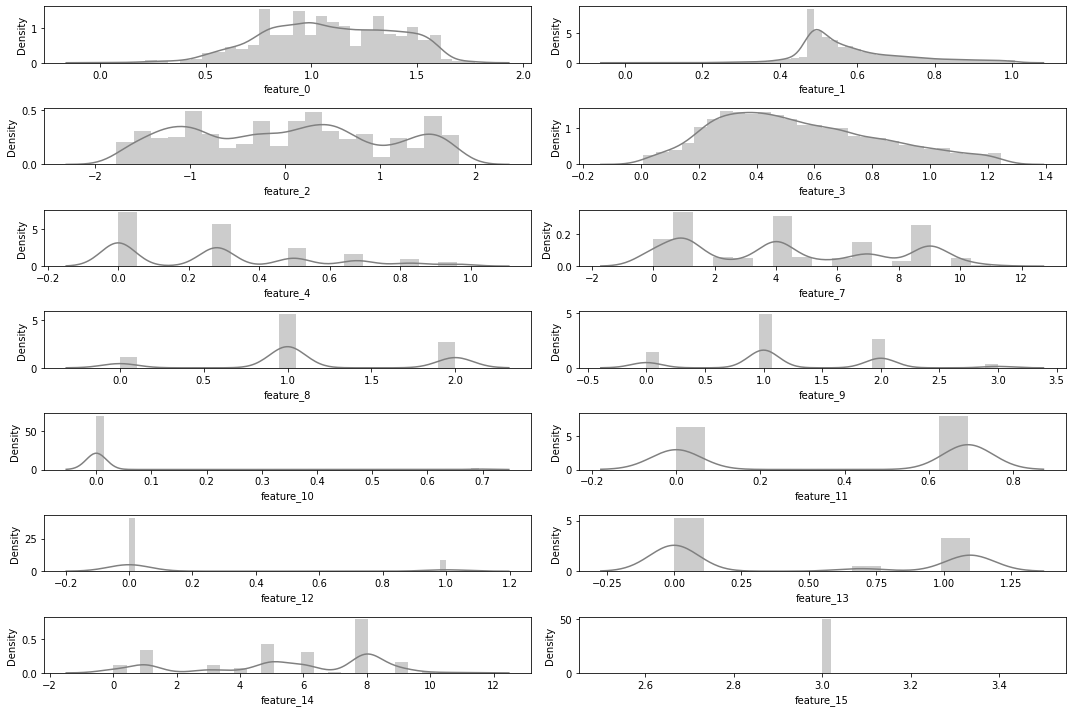

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, X_test.shape[1]):
    plt.subplot(7, X_test.shape[1]/6, i+1)
    sns.distplot(X_test.iloc[:,i], color='gray')
    plt.tight_layout()

## Feature Scaling

Feature scaling is done by standardization such that the dataset will approach to normal distribution

In [8]:
scaler = StandardScaler()
X_train_SS = scaler.fit_transform(X_train_log)
# Transform the test set only to avoid data leakage
X_test_SS = scaler.transform(X_test)
print('Standardization success!')

Standardization success!


## Handling Imbalanced Class

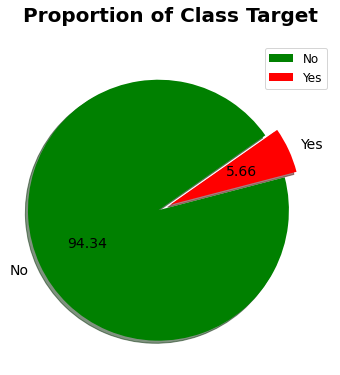

In [23]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["green","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

### SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train_SS, y_train)
print('Class from training data X_train_SMOTE',Counter(y_train_SMOTE))

Class from training data X_train_SMOTE Counter({0: 13942, 1: 13942})


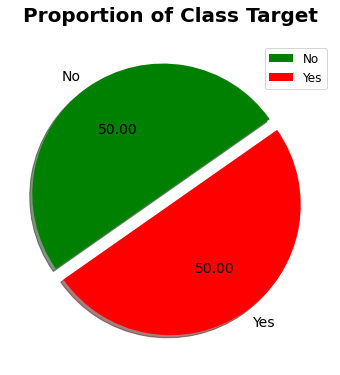

In [53]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train_SMOTE.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["green","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

### SMOTE + TomekLinks

In [40]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
resample2=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_SMOTETomek, y_train_SMOTETomek = resample2.fit_resample(X_train_SS, y_train)

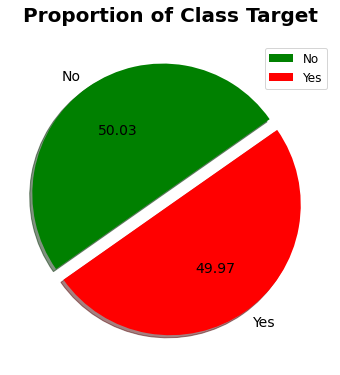

In [60]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train_SMOTETomek.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["No","Yes"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["green","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

# Modelling

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [11]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [12]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# define scoring function 
def custom_auc(y_true,y_pred):
  precision, recall, _ = precision_recall_curve(y_true, y_pred)    
  return auc(recall, precision)

my_auc = make_scorer(custom_auc, greater_is_better=True, needs_proba=True)

## Without Handling Imbalanced Class

### Logistic Regression

Training is success!
PR AUC score:  0.28
ROC AUC score:  0.87
Classification report Logistic Regression Classifier : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5975
           1       0.45      0.05      0.09       359

    accuracy                           0.94      6334
   macro avg       0.70      0.52      0.53      6334
weighted avg       0.92      0.94      0.92      6334



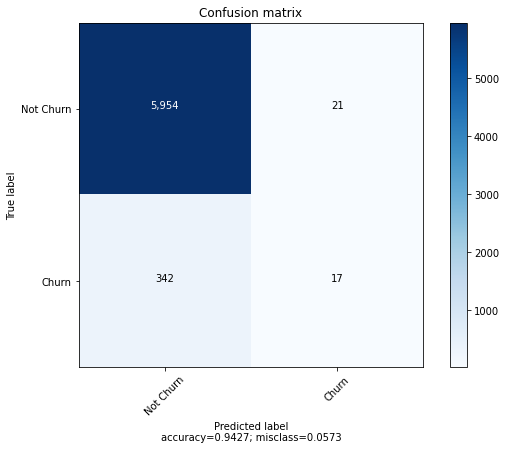

In [15]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_LR.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_LR.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Naive Bayes

Training is success!
PR AUC score:  0.27
ROC AUC score:  0.83
Classification report Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5975
           1       0.34      0.35      0.34       359

    accuracy                           0.92      6334
   macro avg       0.65      0.65      0.65      6334
weighted avg       0.93      0.92      0.93      6334



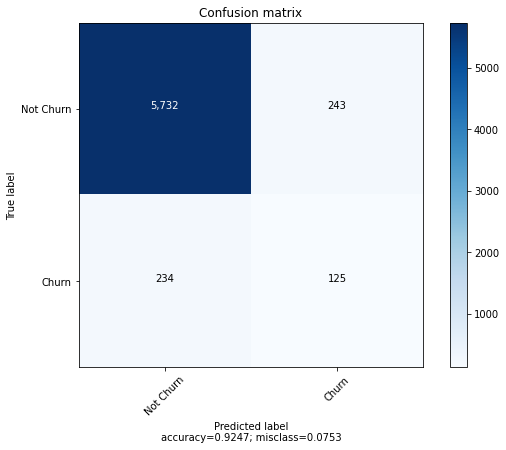

In [17]:
model_NB = GaussianNB()
model_NB.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_NB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_NB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Naive Bayes Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Decision Tree

Training is success!
PR AUC score:  0.32
ROC AUC score:  0.63
Classification report Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5975
           1       0.29      0.30      0.30       359

    accuracy                           0.92      6334
   macro avg       0.63      0.63      0.63      6334
weighted avg       0.92      0.92      0.92      6334



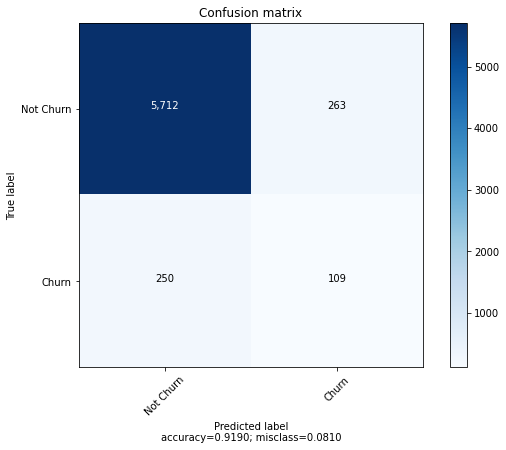

In [19]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_DT.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_DT.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Decision Tree Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Random Forest

Training is success!
PR AUC score:  0.43
ROC AUC score:  0.92
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5975
           1       0.57      0.11      0.19       359

    accuracy                           0.94      6334
   macro avg       0.76      0.55      0.58      6334
weighted avg       0.93      0.94      0.93      6334



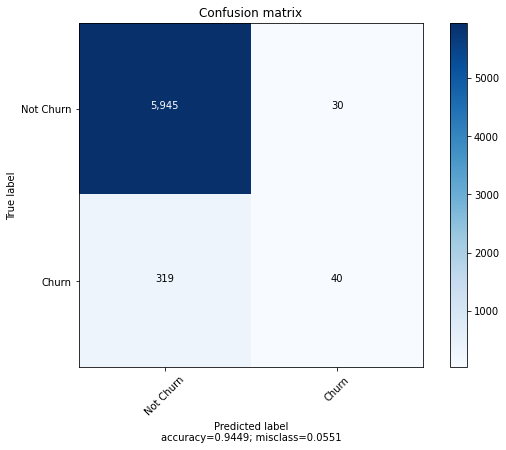

In [21]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_RF.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_RF.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Gradient Boosting

Training is success!
PR AUC score:  0.24
ROC AUC score:  0.83
Classification report Gradient Boosting Trees Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      5975
           1       0.36      0.18      0.24       359

    accuracy                           0.94      6334
   macro avg       0.65      0.58      0.60      6334
weighted avg       0.92      0.94      0.92      6334



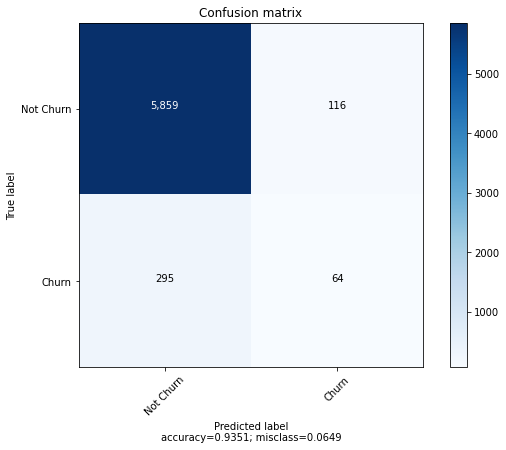

In [95]:
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_GB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_GB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Trees Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### XGB

Training is success!
PR AUC score:  0.46
ROC AUC score:  0.93
Classification report XGB Classifier : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5975
           1       0.64      0.13      0.22       359

    accuracy                           0.95      6334
   macro avg       0.80      0.56      0.59      6334
weighted avg       0.93      0.95      0.93      6334



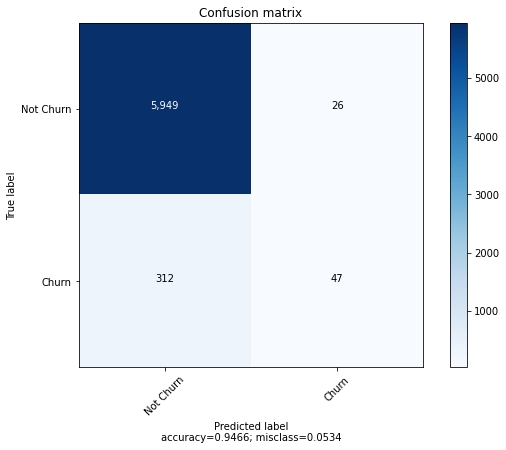

In [25]:
# Without
model_XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_XGB.fit(X_train_SS, y_train) 
print("Training is success!")
predicted = model_XGB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_XGB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report XGB Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## SMOTE

### Logistic Regression

Training is success!
PR AUC score:  0.27
ROC AUC score:  0.86
Classification report Logistic Regression Classifier : 
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      5975
           1       0.18      0.82      0.29       359

    accuracy                           0.78      6334
   macro avg       0.58      0.80      0.58      6334
weighted avg       0.94      0.78      0.84      6334



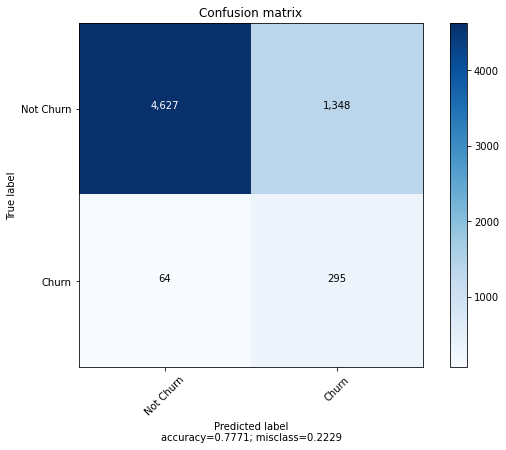

In [34]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_LR.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_LR.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Naive Bayes

Training is success!
PR AUC score:  0.26
ROC AUC score:  0.82
Classification report Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      5975
           1       0.13      0.79      0.23       359

    accuracy                           0.70      6334
   macro avg       0.56      0.74      0.52      6334
weighted avg       0.93      0.70      0.78      6334



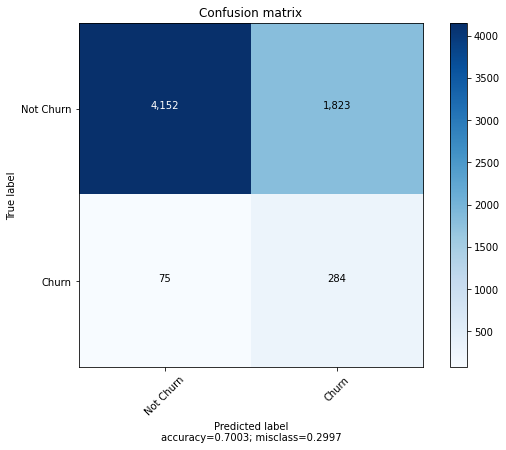

In [35]:
model_NB = GaussianNB()
model_NB.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_NB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_NB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Naive Bayes Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

Training is success!
PR AUC score:  0.11
ROC AUC score:  0.68
Classification report Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.97      0.66      0.78      5975
           1       0.10      0.62      0.17       359

    accuracy                           0.66      6334
   macro avg       0.53      0.64      0.48      6334
weighted avg       0.92      0.66      0.75      6334



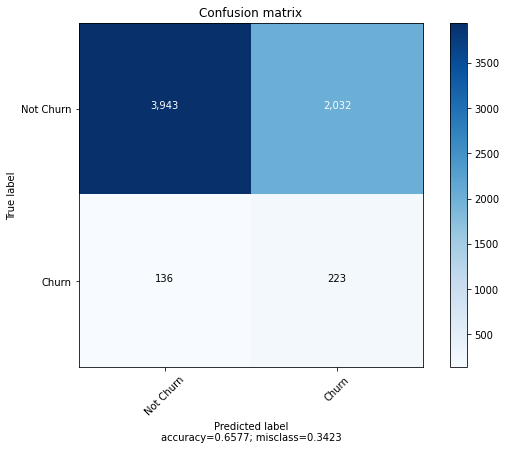

In [67]:
model_SVM = SVC(random_state=42, probability=True)
model_SVM.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_SVM.predict_proba(X_test)
y_pred = predicted[::,1]
predicted = model_SVM.predict(X_test)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Naive Bayes Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Decision Tree

Training is success!
PR AUC score:  0.36
ROC AUC score:  0.67
Classification report Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5975
           1       0.29      0.40      0.33       359

    accuracy                           0.91      6334
   macro avg       0.62      0.67      0.64      6334
weighted avg       0.92      0.91      0.92      6334



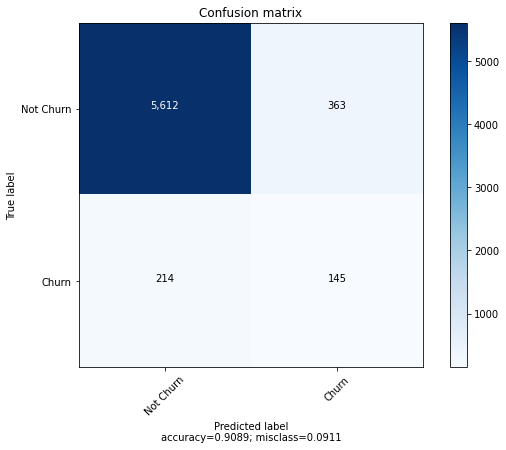

In [36]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_DT.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_DT.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Decision Tree Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Random Forest

Training is success!
PR AUC score:  0.39
ROC AUC score:  0.92
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5975
           1       0.47      0.33      0.39       359

    accuracy                           0.94      6334
   macro avg       0.72      0.65      0.68      6334
weighted avg       0.93      0.94      0.94      6334



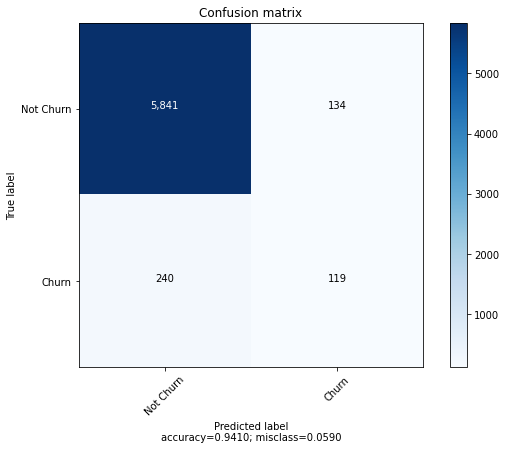

In [39]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_RF.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_RF.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Gradient Boosting

Training is success!
PR AUC score:  0.41
ROC AUC score:  0.91
Classification report Gradient Boosting Trees Classifier : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      5975
           1       0.31      0.62      0.42       359

    accuracy                           0.90      6334
   macro avg       0.64      0.77      0.68      6334
weighted avg       0.94      0.90      0.92      6334



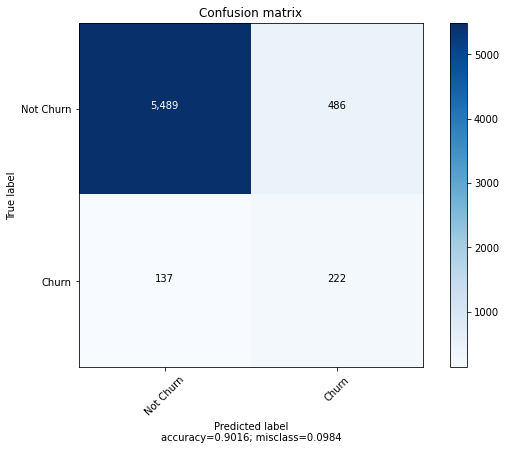

In [37]:
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_GB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_GB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Trees Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### XGB

Training is success!
PR AUC score:  0.41
ROC AUC score:  0.91
Classification report XGB Classifier : 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      5975
           1       0.30      0.66      0.42       359

    accuracy                           0.90      6334
   macro avg       0.64      0.78      0.68      6334
weighted avg       0.94      0.90      0.91      6334



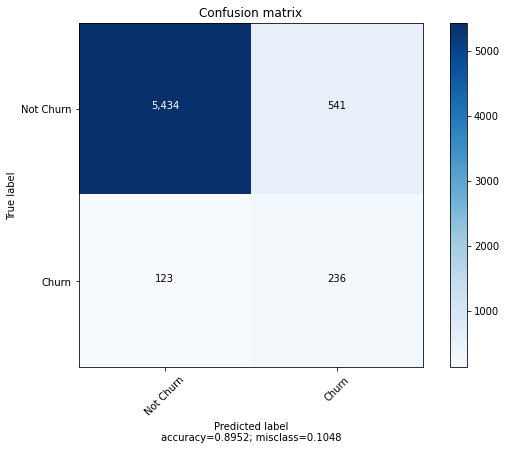

In [38]:
model_XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_XGB.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = model_XGB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_XGB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report XGB Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## SMOTE+TomekLink

### Logistic Regression

Training is success!
PR AUC score:  0.27
ROC AUC score:  0.86
Classification report Logistic Regression Classifier : 
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      5975
           1       0.18      0.82      0.29       359

    accuracy                           0.78      6334
   macro avg       0.58      0.80      0.58      6334
weighted avg       0.94      0.78      0.83      6334



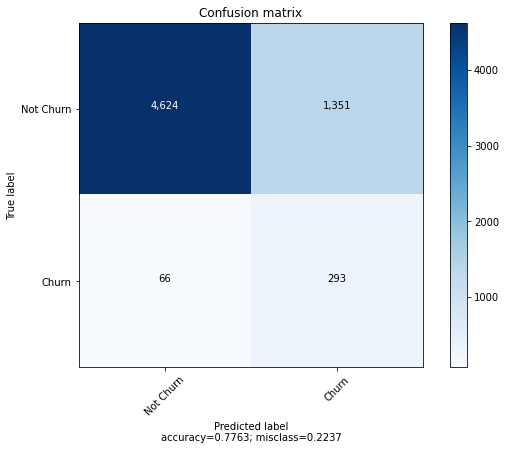

In [41]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_LR.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_LR.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Naive Bayes

Training is success!
PR AUC score:  0.26
ROC AUC score:  0.82
Classification report Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      5975
           1       0.14      0.80      0.23       359

    accuracy                           0.70      6334
   macro avg       0.56      0.75      0.53      6334
weighted avg       0.93      0.70      0.78      6334



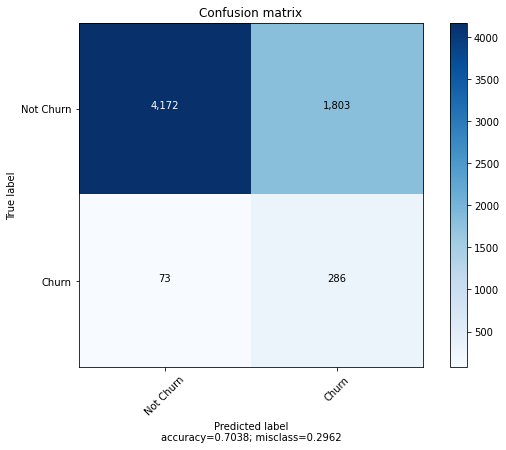

In [42]:
model_NB = GaussianNB()
model_NB.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_NB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_NB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Naive Bayes Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Decision Tree

Training is success!
PR AUC score:  0.35
ROC AUC score:  0.66
Classification report Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5975
           1       0.27      0.39      0.32       359

    accuracy                           0.91      6334
   macro avg       0.62      0.66      0.64      6334
weighted avg       0.92      0.91      0.91      6334



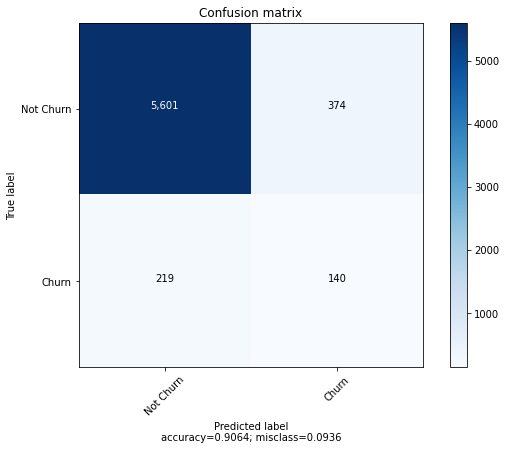

In [43]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_DT.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_DT.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Decision Tree Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Random Forest

Training is success!
PR AUC score:  0.4
ROC AUC score:  0.92
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5975
           1       0.51      0.34      0.41       359

    accuracy                           0.94      6334
   macro avg       0.73      0.66      0.69      6334
weighted avg       0.94      0.94      0.94      6334



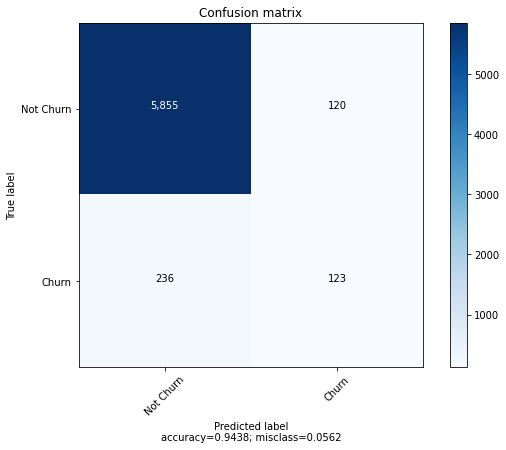

In [44]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_RF.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_RF.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### Gradient Boosting

Training is success!
PR AUC score:  0.12
ROC AUC score:  0.7
Classification report Gradient Boosting Trees Classifier : 
               precision    recall  f1-score   support

           0       0.97      0.52      0.68      5975
           1       0.09      0.77      0.16       359

    accuracy                           0.54      6334
   macro avg       0.53      0.64      0.42      6334
weighted avg       0.92      0.54      0.65      6334



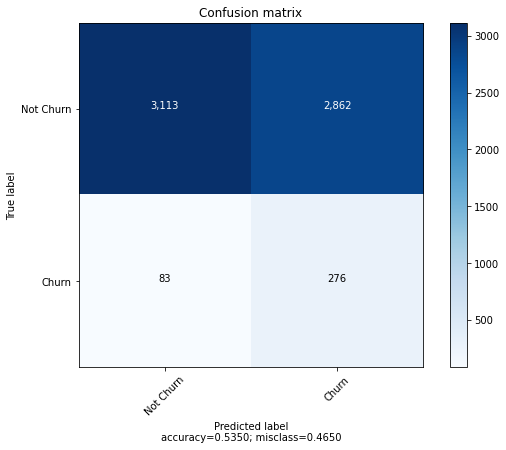

In [65]:
model_GB = RandomForestClassifier(random_state=42)
model_GB.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_GB.predict_proba(X_test)
y_pred = predicted[::,1]
predicted = model_GB.predict(X_test)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Trees Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

### XGB

Training is success!
PR AUC score:  0.41
ROC AUC score:  0.91
Classification report XGB Classifier : 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      5975
           1       0.29      0.64      0.40       359

    accuracy                           0.89      6334
   macro avg       0.63      0.77      0.67      6334
weighted avg       0.94      0.89      0.91      6334



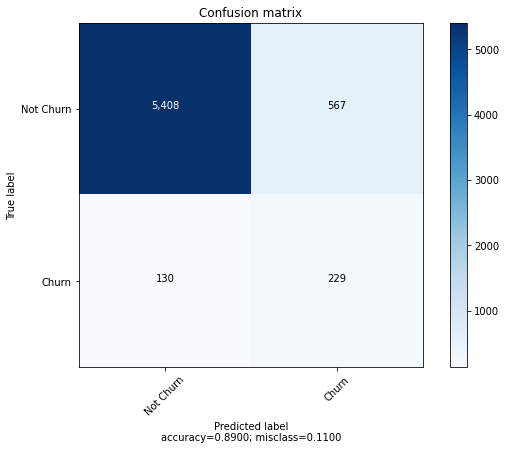

In [45]:
model_XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_XGB.fit(X_train_SMOTETomek, y_train_SMOTETomek) 
print("Training is success!")
predicted = model_XGB.predict_proba(X_test_SS)
y_pred = predicted[::,1]
predicted = model_XGB.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report XGB Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# Model Evaluation

In [53]:
LR = LogisticRegression(random_state=42)

penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

grid_params = dict(penalty=penalty, C=C)

clf = RandomizedSearchCV(LR, grid_params, n_iter=100, cv=5, random_state=42, scoring='roc_auc', n_jobs=-1)
model = clf.fit(X_train_SMOTE, y_train_SMOTE)
print("Best Score: ", clf.best_score_) 
print("Best Params: ", clf.best_params_) 

Best Score:  0.8706245778200046
Best Params:  {'penalty': 'l2', 'C': 0.012742749857031334}


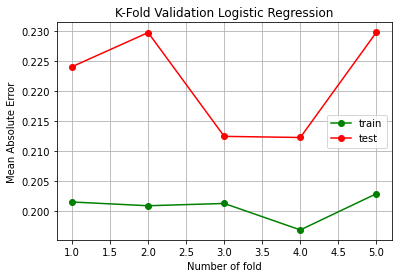

In [54]:
scores_train = []
scores_test = []

lr = LogisticRegression(random_state=42,penalty='l2',C=0.012742749857031334)
s = StandardScaler()
smt2 = SMOTE(random_state=0)
skewed_negative = ['feature_0','feature_1','feature_3','feature_4']
skewed = ['feature_10','feature_11','feature_13']

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(df_train_feat):
  X_train = df_train_feat.take(list(train_index),axis=0)
  X_test = df_train_feat.take(list(test_index),axis=0)
  y_train, y_test = df_train_target.take(list(train_index),axis=0), df_train_target.take(list(test_index),axis=0)
  X_train_copy = X_train.copy()

  for i in skewed_negative:
    X_train[i] = (X_train[i]-X_train[i].min()+1).transform(np.log)
  for i in skewed:
    logt = np.log(X_train[i]+1)
    X_train[i] = logt

  for i in skewed_negative:
    X_test[i] = (X_test[i]-X_train_copy[i].min()+1).transform(np.log)
  for i in skewed:
    logt = np.log(X_test[i]+1)
    X_test[i] = logt

  # Standard Scaler
  X_train = s.fit_transform(X_train)
  X_test = s.transform(X_test)

  X_train_SMOTE, y_train_SMOTE = smt2.fit_resample(X_train, y_train)

  # Train the training data
  lr.fit(X_train_SMOTE, y_train_SMOTE)
  # Predict training and testing
  y_train_pred = lr.predict(X_train_SMOTE)
  y_pred = lr.predict(X_test)
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train_SMOTE, y_train_pred)
  score_test = mean_absolute_error(y_test, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.title('K-Fold Validation Logistic Regression')
plt.show()

Training is success!
PR AUC score:  0.27
ROC AUC score:  0.87
Classification report Logistic Regression Classifier : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      5975
           1       0.18      0.82      0.30       359

    accuracy                           0.78      6334
   macro avg       0.58      0.80      0.58      6334
weighted avg       0.94      0.78      0.84      6334



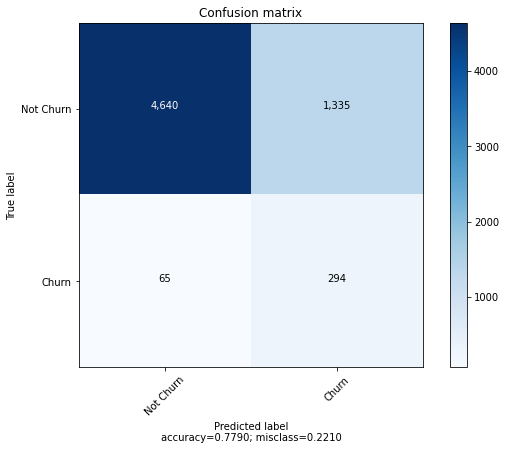

In [64]:
model_LR = LogisticRegression(random_state=42,penalty='l2',C=0.012742749857031334)
model_LR.fit(X_train_SMOTE, y_train_SMOTE) 
print("Training is success!")
predicted = clf.predict_proba(X_test_SS)
y_pred = predicted[:,1]
predicted = clf.predict(X_test_SS)
# classification report for precision, recall f1-score and accuracy
#calculate AUC of model
#print(predicted.shape)
#print(y_test.shape)
#print(y_pred.shape)
auc = metrics.roc_auc_score(y_test, y_pred)
#calculate AUC of model
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = metrics.auc(recall, precision)
#print AUC score
print("PR AUC score: ", np.round(pr_auc, 2))
#print AUC score
print("ROC AUC score: ", np.round(auc, 2))
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Not Churn","Churn"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

# Model Interpretation

In [71]:
# get importance
importance = model_LR.coef_[0]
importance.shape

(14,)

In [72]:
feature_importance = pd.DataFrame({'features':df_train_feat.columns,'importance':importance})
feature_importance.head()

,features,importance
0,feature_0,-0.174884
1,feature_1,0.233636
2,feature_2,-0.153416
3,feature_3,1.197781
4,feature_4,-0.417050


In [73]:
feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10)

,features,importance
3,feature_3,1.197781
1,feature_1,0.233636
7,feature_9,0.230678
12,feature_14,0.055012
6,feature_8,0.025619
5,feature_7,0.012683


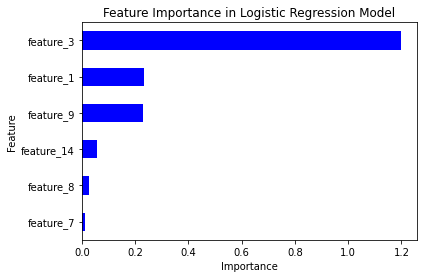

In [76]:
plot = feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10).plot.barh(color='blue',legend=None)
plot.set_yticklabels(feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Data Validation Prediction

In [77]:
test_churn = pd.read_csv('/content/drive/MyDrive/IBM ML/Classification/test_churn.csv')
test_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   11303 non-null  float64
 1   feature_1   11303 non-null  float64
 2   feature_2   11303 non-null  float64
 3   feature_3   11303 non-null  float64
 4   feature_4   11303 non-null  float64
 5   feature_7   11303 non-null  int64  
 6   feature_8   11303 non-null  int64  
 7   feature_9   11303 non-null  int64  
 8   feature_10  11303 non-null  int64  
 9   feature_11  11303 non-null  int64  
 10  feature_12  11303 non-null  int64  
 11  feature_13  11303 non-null  int64  
 12  feature_14  11303 non-null  int64  
 13  feature_15  11303 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 1.2 MB


In [78]:
# Transforming test_churn
for i in skewed_negative:
  #print('Minimum of',i,'is',X_train[i].min()) # to be used for testing data
  test_churn[i] = (test_churn[i]-X_train[i].min()+1).transform(np.log)

for i in skewed:
  logt = np.log(test_churn[i]+1)
  test_churn[i] = logt


print("Transformation success!")

Transformation success!


In [79]:
# Transform the test set only to avoid data leakage
test_churn = scaler.transform(test_churn)
print('Standardization success!')

Standardization success!


In [83]:
prediction = clf.predict(test_churn)
df_prediction = pd.DataFrame(range(0, len(prediction)), columns = ["Id"] )
df_prediction["labels"] = prediction
# df_prediction.rename(columns={"index": "Id"})
df_prediction = df_prediction[['labels']]
df_prediction.head()

,labels
0,1
1,0
2,0
3,0
4,0


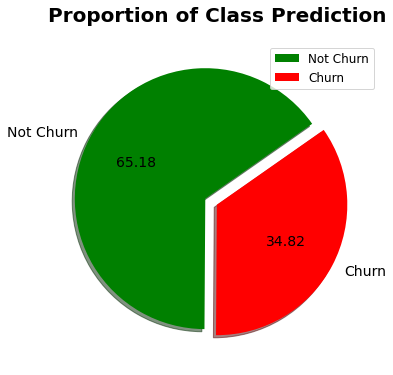

In [85]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        df_prediction.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Not Churn","Churn"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["green","red"], 
        startangle=35)

plt.title("Proportion of Class Prediction",fontsize=20, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

In [86]:
df_prediction.to_csv('prediction_submission.csv', index=False)
!cp 'prediction_submission.csv' '/content/drive/MyDrive/IBM ML/Classification'
print('Saving data is done!')

Saving data is done!
